In [2]:
## Install necessary packages in terminal using pip install (cartopy, geopandas)
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
import cmocean.cm as cmo
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd
import matplotlib.ticker as ticker
import seawater
import matplotlib.gridspec as gridspec
import geopandas as gpd
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D
from scipy.ndimage.filters import gaussian_filter
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, RIVERS


/var/folders/ns/nv0myc8145dctt38_60qt7gm0000gp/T/ipykernel_71163/158285335.py:14: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater


In [32]:

#import cmocean
hfont = {'fontname':'Helvetica'}

## Read in you excel sheet with your lat lons
df = pd.read_csv('/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/models/Q2B/plotting.csv') 
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['date']

0    2023-08-01
1    2023-08-01
2    2023-08-01
3    2023-08-01
4    2023-08-01
        ...    
79   2024-02-01
80   2024-02-01
81   2024-02-01
82   2024-02-01
83   2024-02-01
Name: date, Length: 84, dtype: datetime64[ns]

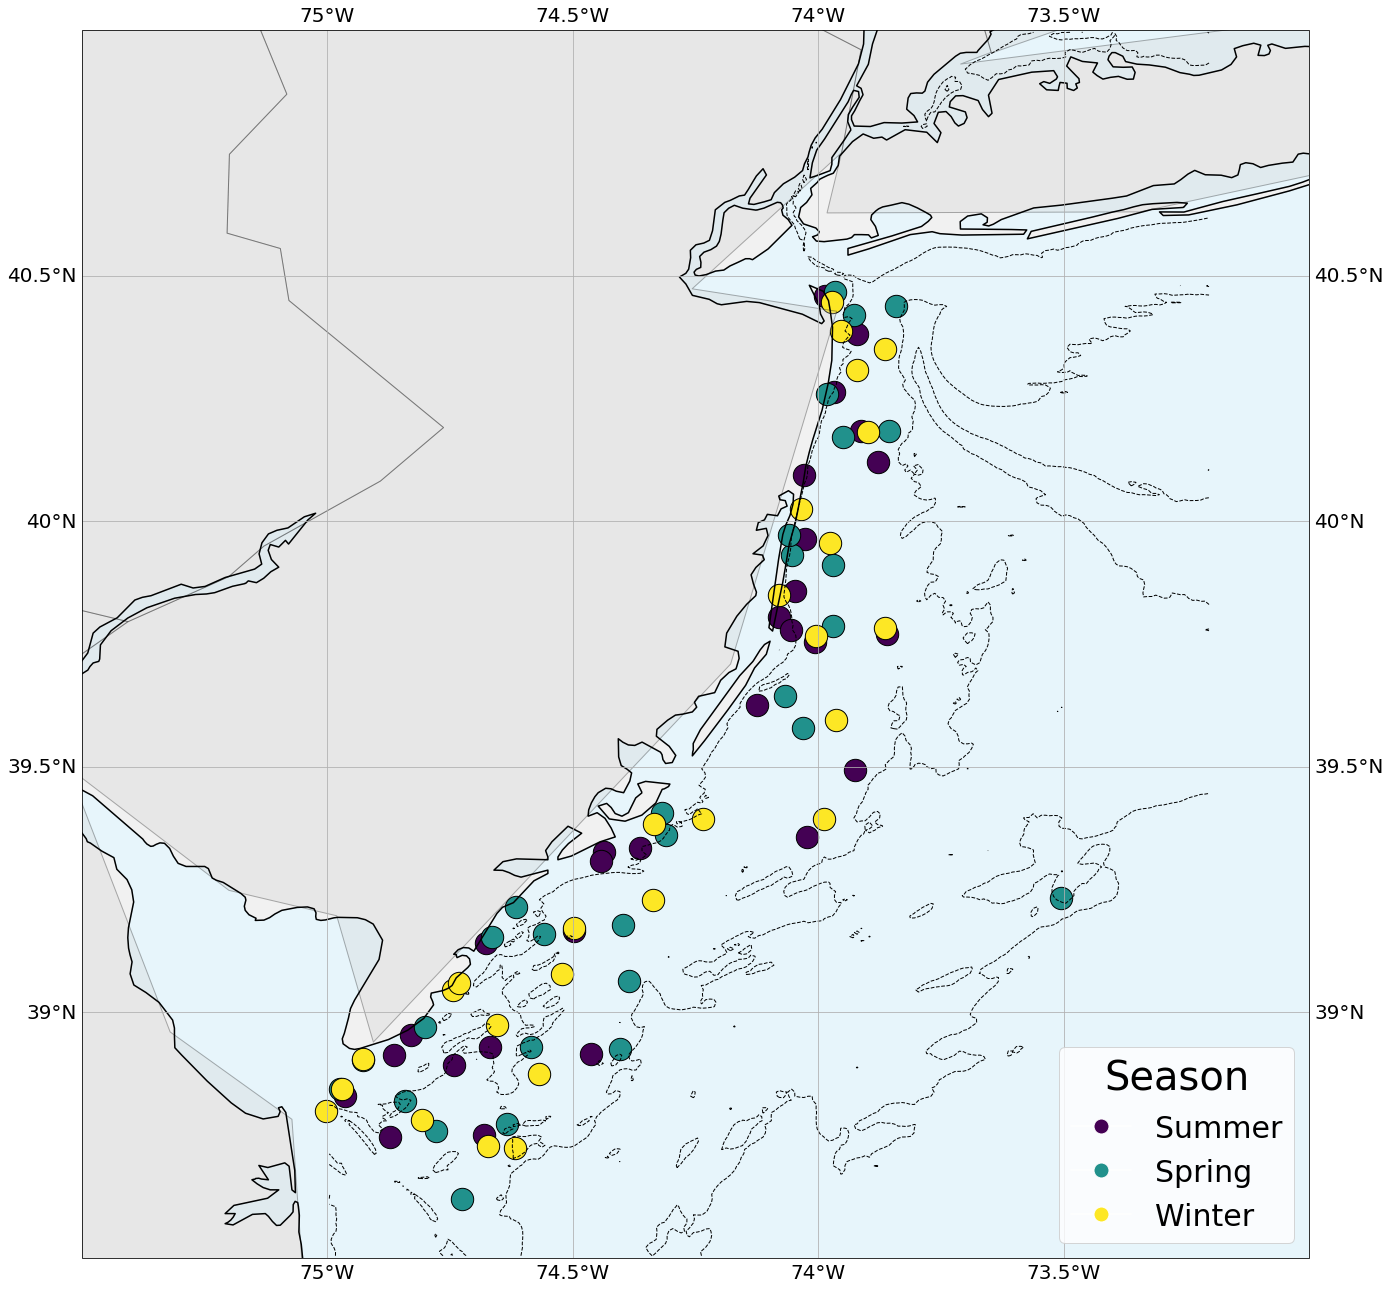

In [34]:

# Assigning a unique color to each date
unique_dates = df['date'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_dates)))
color_dict = {date: color for date, color in zip(unique_dates, colors)}

# Season labels using pd.Timestamp for consistent format
season_labels = {
    pd.Timestamp('2023-06-01'): 'Spring',
    pd.Timestamp('2023-08-01'): 'Summer',
    pd.Timestamp('2024-02-01'): 'Winter'
}

# Map configuration
plt.figure(figsize=(22, 36))
ax = plt.axes(projection=ccrs.PlateCarree())

# Load ETOPO dataset
fname = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/30s/30s_bed_elev_netcdf/ETOPO_2022_v1_30s_N90W180_bed.nc'
ds_etpo = xr.open_dataset(fname)
lon1, lon2 = -75, -73.2
lat1, lat2 = 38.5, 41
etopo1 = ds_etpo.sel(lon=slice(lon1, lon2), lat=slice(lat1, lat2))
bathy_levels = [-45, -30, -15]
ax.contour(etopo1.lon, etopo1.lat, etopo1.z, bathy_levels, transform=ccrs.PlateCarree(), colors='black', linewidths=1)

# Add map features
ax.add_feature(cfeature.LAND, color="lightgrey", alpha=0.3)
ax.add_feature(cfeature.OCEAN, color="skyblue", alpha=0.2)
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)
ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(), edgecolor="black", facecolor="lightgrey", alpha=0.3
)

# Plot points with colors based on date
for date, color in color_dict.items():
    ax.scatter(df[df['date'] == date]["Longitude"], df[df['date'] == date]["Latitude"],
               edgecolor='black', c=[color], s=500, label=season_labels[pd.Timestamp(date)])

# Custom legend with season names
legend_elements = [Line2D([0], [0], marker='o', color='w', label=season_labels[pd.Timestamp(date)],
                          markerfacecolor=color, markersize=15) for date, color in color_dict.items()]
ax.legend(handles=legend_elements, title='Season', fontsize=30, title_fontsize=40, loc='lower right')

# Additional map features
ax.coastlines(resolution='10m', linewidth=1.5)
ax.set_extent([-75.5, -73, 38.5, 41])

# Gridlines
gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = True  # Set to True to show gridlines
gridliner.xlines = True
gridliner.xlabel_style = {'size': 20, 'color': 'black'}
gridliner.ylabel_style = {'color': 'black', 'size': 20}

plt.show()

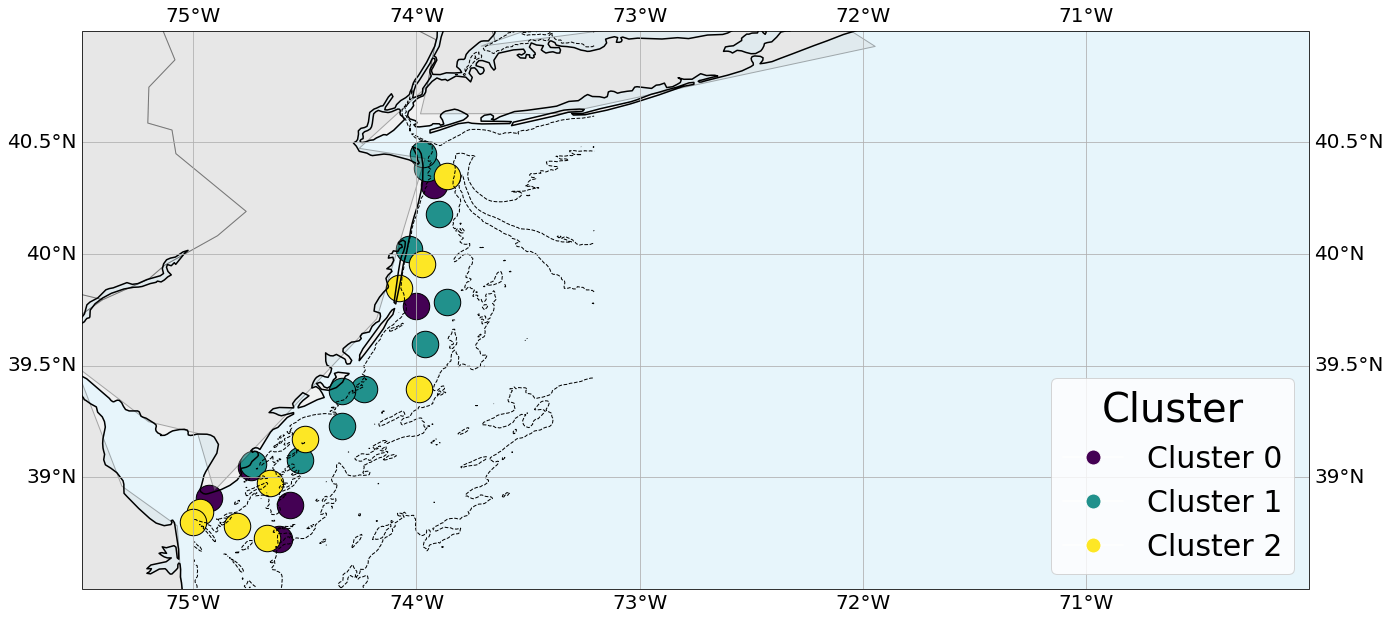

In [40]:
feb_df = df[df['sampling_bout'] == 'Feb_24']
unique_clusters = np.unique(feb_df['cluster'])
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))
color_dict = {cluster: color for cluster, color in zip(unique_clusters, colors)}

# Map configuration
plt.figure(figsize=(22, 36))
ax = plt.axes(projection=ccrs.PlateCarree())

# Load ETOPO dataset
fname = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/30s/30s_bed_elev_netcdf/ETOPO_2022_v1_30s_N90W180_bed.nc'
ds_etpo = xr.open_dataset(fname)
lon1, lon2 = -75, -73.2
lat1, lat2 = 38.5, 41
etopo1 = ds_etpo.sel(lon=slice(lon1, lon2), lat=slice(lat1, lat2))
bathy_levels = [-45, -30, -15]
ax.contour(etopo1.lon, etopo1.lat, etopo1.z, bathy_levels, transform=ccrs.PlateCarree(), colors='black', linewidths=1)

# Add map features
ax.add_feature(cfeature.LAND, color="lightgrey", alpha=0.3)
ax.add_feature(cfeature.OCEAN, color="skyblue", alpha=0.2)
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)
ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(), edgecolor="black", facecolor="lightgrey", alpha=0.3
)

# Plot points with colors based on cluster
for cluster, color in color_dict.items():
    ax.scatter(feb_df[feb_df['cluster'] == cluster]["Longitude"], feb_df[feb_df['cluster'] == cluster]["Latitude"],
               edgecolor='black', c=[color], s=700, label=f'Cluster {cluster}')

# Custom legend with cluster labels
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=color, markersize=15) for cluster, color in color_dict.items()]
ax.legend(handles=legend_elements, title='Cluster', fontsize=30, title_fontsize=40, loc='lower right')

# Additional map features
ax.coastlines(resolution='10m', linewidth=1.5)
ax.set_extent([-75.5, -70, 38.5, 41])

# Gridlines
gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gridliner.xlabels_top = False
# gridliner.xlabels_bottom = True
# gridliner.ylabels_left = True
# gridliner.ylabels_right = False
gridliner.ylines = True
gridliner.xlines = True
gridliner.xlabel_style = {'size': 20, 'color': 'black'}
gridliner.ylabel_style = {'color': 'black', 'size': 20}

plt.show()


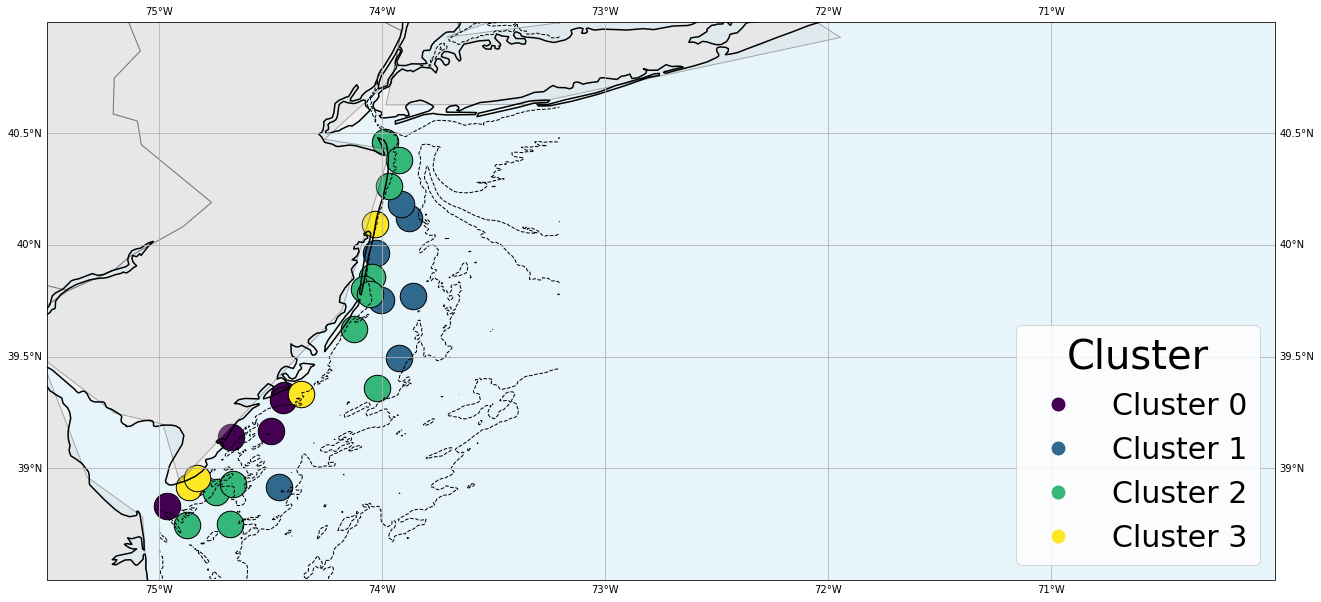

In [42]:
aug_df = df[df['sampling_bout'] == 'Aug_23']
unique_clusters = np.unique(aug_df['cluster'])
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))
color_dict = {cluster: color for cluster, color in zip(unique_clusters, colors)}

# Map configuration
plt.figure(figsize=(22, 36))
ax = plt.axes(projection=ccrs.PlateCarree())

# Load ETOPO dataset
fname = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/30s/30s_bed_elev_netcdf/ETOPO_2022_v1_30s_N90W180_bed.nc'
ds_etpo = xr.open_dataset(fname)
lon1, lon2 = -75, -73.2
lat1, lat2 = 38.5, 41
etopo1 = ds_etpo.sel(lon=slice(lon1, lon2), lat=slice(lat1, lat2))
bathy_levels = [-45, -30, -15]
ax.contour(etopo1.lon, etopo1.lat, etopo1.z, bathy_levels, transform=ccrs.PlateCarree(), colors='black', linewidths=1)

# Add map features
ax.add_feature(cfeature.LAND, color="lightgrey", alpha=0.3)
ax.add_feature(cfeature.OCEAN, color="skyblue", alpha=0.2)
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)
ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(), edgecolor="black", facecolor="lightgrey", alpha=0.3
)

# Plot points with colors based on cluster
for cluster, color in color_dict.items():
    ax.scatter(aug_df[aug_df['cluster'] == cluster]["Longitude"], aug_df[aug_df['cluster'] == cluster]["Latitude"],
               edgecolor='black', c=[color], s=700, label=f'Cluster {cluster}')

# Custom legend with cluster labels
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=color, markersize=15) for cluster, color in color_dict.items()]
ax.legend(handles=legend_elements, title='Cluster', fontsize=30, title_fontsize=40, loc='lower right')

# Additional map features
ax.coastlines(resolution='10m', linewidth=1.5)
ax.set_extent([-75.5, -70, 38.5, 41])

# Gridlines
gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = False  # Disable labels at the bottom
gridliner.ylabels_left = False    # Disable labels on the left
gridliner.ylabels_right = False
gridliner.ylines = True
gridliner.xlines = True

plt.show()


# Plots of bottom temp

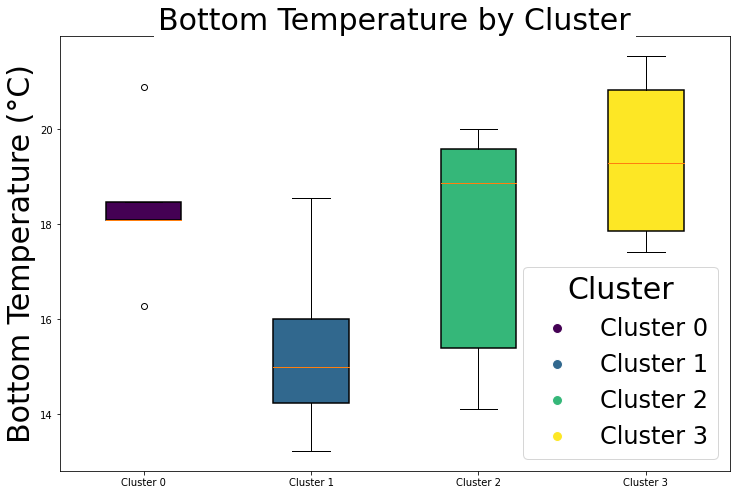

In [55]:
unique_clusters = np.unique(aug_df['cluster'])
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))
color_dict = {cluster: color for cluster, color in zip(unique_clusters, colors)}

# Create boxplot
plt.figure(figsize=(12, 8))

# Boxplot data preparation
data = [aug_df[aug_df['cluster'] == cluster]['Bottom_Temp'] for cluster in unique_clusters]

# Boxplot plotting
boxplot = plt.boxplot(data, patch_artist=True, labels=[f'Cluster {cluster}' for cluster in unique_clusters])

# Customize colors
for patch, cluster in zip(boxplot['boxes'], unique_clusters):
    patch.set_facecolor(color_dict[cluster])
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

# Adding labels and title
# plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Bottom Temperature (°C)', fontsize=30, backgroundcolor='white')
plt.title('Bottom Temperature by Cluster', fontsize=30, backgroundcolor='white')

# Customize legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                              markerfacecolor=color_dict[cluster], markersize=10) for cluster in unique_clusters]
plt.legend(handles=legend_elements, title='Cluster', fontsize=24, title_fontsize=30, loc='lower right')

plt.show()


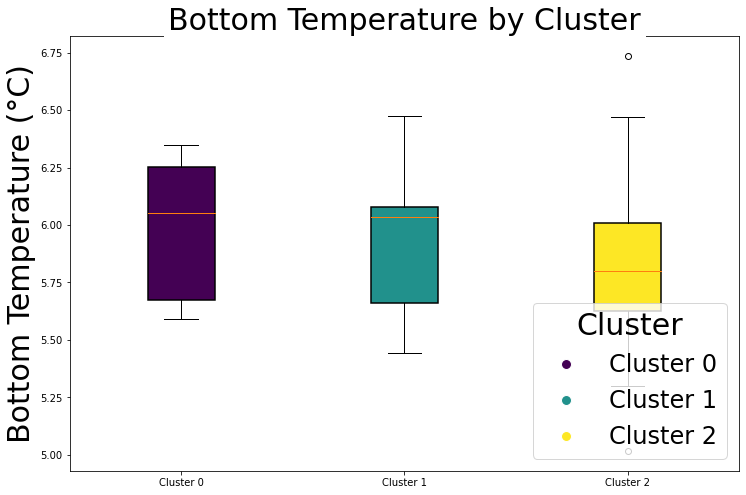

In [56]:
unique_clusters = np.unique(feb_df['cluster'])
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))
color_dict = {cluster: color for cluster, color in zip(unique_clusters, colors)}

# Create boxplot
plt.figure(figsize=(12, 8))

# Boxplot data preparation
data = [feb_df[feb_df['cluster'] == cluster]['Bottom_Temp'] for cluster in unique_clusters]

# Boxplot plotting
boxplot = plt.boxplot(data, patch_artist=True, labels=[f'Cluster {cluster}' for cluster in unique_clusters])

# Customize colors
for patch, cluster in zip(boxplot['boxes'], unique_clusters):
    patch.set_facecolor(color_dict[cluster])
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

# Adding labels and title
# plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Bottom Temperature (°C)', fontsize=30, backgroundcolor='white')
plt.title('Bottom Temperature by Cluster', fontsize=30, backgroundcolor='white')

# Customize legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                              markerfacecolor=color_dict[cluster], markersize=10) for cluster in unique_clusters]
plt.legend(handles=legend_elements, title='Cluster', fontsize=24, title_fontsize=30, loc='lower right')

plt.show()
